In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
# Snowpark
from snowflake.snowpark.session import Session
from snowflake.snowpark import functions as F
from snowflake.snowpark.types import *
from snowflake.snowpark.version import VERSION
from snowflake.snowpark.functions import pandas_udf


In [3]:
# Read credentials
with open('creds.json') as f:
    connection_parameters = json.load(f)    
session = Session.builder.configs(connection_parameters).create()

In [4]:
snowpark_version = VERSION
print('Database                    : {}'.format(session.get_current_database()))
print('Schema                      : {}'.format(session.get_current_schema()))
print('Warehouse                   : {}'.format(session.get_current_warehouse()))
print('Role                        : {}'.format(session.get_current_role()))
print('Snowpark for Python version : {}.{}.{}'.format(snowpark_version[0],snowpark_version[1],snowpark_version[2]))

Database                    : "HOUSING"
Schema                      : "PUBLIC"
Warehouse                   : "XSMALL_WH"
Role                        : "ACCOUNTADMIN"
Snowpark for Python version : 1.0.0


In [5]:
session.sql("SELECT count(*) FROM HOUSING.PUBLIC.HOUSINGPRICE").collect()

[Row(COUNT(*)=30144)]

In [6]:
housepricingdf = session.table("HOUSING.PUBLIC.HOUSINGPRICE")

In [7]:
housepricingdf=housepricingdf.to_pandas()
type(housepricingdf)

pandas.core.frame.DataFrame

In [8]:
housepricingdf.columns = map(lambda x: str(x).upper(), housepricingdf.columns)

In [9]:
housepricingdf.head()

,DATE,SUBURB,ADDRESS,ROOMS,TYPE,PRICE,METHOD,SELLERG,DATE.1,DISTANCE,...,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,YEARBUILT,COUNCILAREA,LATTITUDE,LONGTITUDE,REGIONNAME,PROPERTYCOUNT
0,2016-01-28,Surrey Hills,999A Riversdale Rd,3,h,1205000.0,S,Fletchers,2016-01-28,11.2,...,1.0,2.0,490.0,NaN,NaN,Boroondara City Council,-37.8361,145.1006,Southern Metropolitan,5457.0
1,2016-01-28,Surrey Hills,1/10 Florence Rd,2,u,813000.0,S,Fletchers,2016-01-28,11.2,...,1.0,2.0,108.0,NaN,NaN,Boroondara City Council,-37.8276,145.1023,Southern Metropolitan,5457.0
2,2016-01-28,Canterbury,140 Canterbury Rd,4,h,NaN,SP,Fletchers,2016-01-28,9.0,...,2.0,0.0,808.0,198.0,1910.0,Boroondara City Council,-37.8235,145.0751,Southern Metropolitan,3265.0
3,2016-03-09,Williamstown,54 Twyford St,3,h,1535000.0,S,Greg,2016-03-09,8.0,...,1.0,1.0,507.0,186.0,1910.0,Hobsons Bay City Council,-37.8681,144.8994,Western Metropolitan,6380.0
4,2016-03-09,Newport,1/26 Thorpe St,3,h,826000.0,S,Village,2016-03-09,8.4,...,1.0,2.0,281.0,100.0,1957.0,Hobsons Bay City Council,-37.8457,144.8651,Western Metropolitan,5498.0


In [10]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30144 entries, 0 to 30143
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           30144 non-null  object 
 1   SUBURB         30144 non-null  object 
 2   ADDRESS        30144 non-null  object 
 3   ROOMS          30144 non-null  int8   
 4   TYPE           30144 non-null  object 
 5   PRICE          23573 non-null  float64
 6   METHOD         30144 non-null  object 
 7   SELLERG        30144 non-null  object 
 8   DATE.1         30144 non-null  object 
 9   DISTANCE       30144 non-null  float64
 10  POSTCODE       30144 non-null  float64
 11  BEDROOM2       23327 non-null  float64
 12  BATHROOM       23321 non-null  float64
 13  CAR            22982 non-null  float64
 14  LANDSIZE       20078 non-null  float64
 15  BUILDINGAREA   12147 non-null  float64
 16  YEARBUILT      13827 non-null  float64
 17  COUNCILAREA    30142 non-null  object 
 18  LATTIT

In [11]:
housepricingdf.isnull().sum()

DATE                 0
SUBURB               0
ADDRESS              0
ROOMS                0
TYPE                 0
PRICE             6571
METHOD               0
SELLERG              0
DATE.1               0
DISTANCE             0
POSTCODE             0
BEDROOM2          6817
BATHROOM          6823
CAR               7162
LANDSIZE         10066
BUILDINGAREA     17997
YEARBUILT        16317
COUNCILAREA          2
LATTITUDE         6600
LONGTITUDE        6600
REGIONNAME           2
PROPERTYCOUNT        2
dtype: int64

In [12]:
housepricingdf.describe()

,ROOMS,PRICE,DISTANCE,POSTCODE,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,YEARBUILT,LATTITUDE,LONGTITUDE,PROPERTYCOUNT
count,30144.000000,2.357300e+04,30144.000000,30144.000000,23327.000000,23321.000000,22982.000000,20078.000000,12147.000000,13827.000000,23544.000000,23544.000000,30142.000000
mean,3.015725,1.055272e+06,10.894533,3114.059216,3.039311,1.606063,1.693195,584.022263,158.001108,1964.950170,-37.812025,145.001666,7544.185754
std,0.974964,6.464492e+05,6.558900,104.132112,0.993397,0.723174,1.001103,3557.012648,422.167797,37.401358,0.086615,0.115427,4423.509742
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.185600,144.423790,83.000000
25%,2.000000,6.360000e+05,6.300000,3049.000000,2.000000,1.000000,1.000000,203.000000,100.000000,1940.000000,-37.861803,144.936245,4380.000000
50%,3.000000,8.800000e+05,10.100000,3103.000000,3.000000,1.000000,2.000000,493.000000,133.000000,1970.000000,-37.808780,145.006800,6763.000000
75%,4.000000,1.300000e+06,13.800000,3153.000000,4.000000,2.000000,2.000000,666.750000,184.000000,2000.000000,-37.757000,145.069163,10331.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.000000,2106.000000,-37.395100,145.526350,21650.000000


In [13]:
housepricingdf.nunique()

DATE                68
SUBURB             346
ADDRESS          29486
ROOMS               12
TYPE                 3
PRICE             2722
METHOD               9
SELLERG            363
DATE.1              68
DISTANCE           213
POSTCODE           208
BEDROOM2            15
BATHROOM            11
CAR                 14
LANDSIZE          1631
BUILDINGAREA       721
YEARBUILT          156
COUNCILAREA         33
LATTITUDE        11161
LONGTITUDE       12203
REGIONNAME           8
PROPERTYCOUNT      339
dtype: int64

In [14]:
cols=['SUBURB','ROOMS','TYPE','METHOD','SELLERG','REGIONNAME','PROPERTYCOUNT','DISTANCE','COUNCILAREA','BEDROOM2','BATHROOM'
           ,'CAR','LANDSIZE','BUILDINGAREA','PRICE']
housepricingdf=housepricingdf[cols]
housepricingdf

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,Surrey Hills,3,h,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,3.0,1.0,2.0,490.0,NaN,1205000.0
1,Surrey Hills,2,u,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,2.0,1.0,2.0,108.0,NaN,813000.0
2,Canterbury,4,h,SP,Fletchers,Southern Metropolitan,3265.0,9.0,Boroondara City Council,4.0,2.0,0.0,808.0,198.0,NaN
3,Williamstown,3,h,S,Greg,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,1.0,1.0,507.0,186.0,1535000.0
4,Newport,3,h,S,Village,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,2.0,1.0,2.0,281.0,100.0,826000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30139,Highett,3,h,S,Greg,Southern Metropolitan,4794.0,16.0,Bayside City Council,3.0,1.0,2.0,700.0,NaN,1242000.0
30140,Highett,3,t,PI,Purplebricks,Southern Metropolitan,4794.0,16.0,Bayside City Council,NaN,NaN,NaN,NaN,NaN,1395000.0
30141,Hoppers Crossing,4,h,S,Barry,Western Metropolitan,13830.0,18.4,Wyndham City Council,4.0,2.0,2.0,650.0,NaN,540000.0
30142,South Melbourne,4,h,PI,Marshall,Southern Metropolitan,5943.0,1.9,Port Phillip City Council,4.0,2.0,0.0,178.0,174.0,NaN


In [15]:
housepricingdf.isnull().sum()

SUBURB               0
ROOMS                0
TYPE                 0
METHOD               0
SELLERG              0
REGIONNAME           2
PROPERTYCOUNT        2
DISTANCE             0
COUNCILAREA          2
BEDROOM2          6817
BATHROOM          6823
CAR               7162
LANDSIZE         10066
BUILDINGAREA     17997
PRICE             6571
dtype: int64

In [16]:
cols_zero = ['PROPERTYCOUNT','DISTANCE','BEDROOM2','BATHROOM','CAR']
housepricingdf[cols_zero]=housepricingdf[cols_zero].fillna(0)


In [17]:
housepricingdf.LANDSIZE=housepricingdf.LANDSIZE.fillna(housepricingdf.LANDSIZE.mean())
housepricingdf.BUILDINGAREA=housepricingdf.BUILDINGAREA.fillna(housepricingdf.BUILDINGAREA.mean())


In [18]:
housepricingdf.dropna(inplace=True)
housepricingdf.isnull().sum()

SUBURB           0
ROOMS            0
TYPE             0
METHOD           0
SELLERG          0
REGIONNAME       0
PROPERTYCOUNT    0
DISTANCE         0
COUNCILAREA      0
BEDROOM2         0
BATHROOM         0
CAR              0
LANDSIZE         0
BUILDINGAREA     0
PRICE            0
dtype: int64

In [19]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23571 entries, 0 to 30141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBURB         23571 non-null  object 
 1   ROOMS          23571 non-null  int8   
 2   TYPE           23571 non-null  object 
 3   METHOD         23571 non-null  object 
 4   SELLERG        23571 non-null  object 
 5   REGIONNAME     23571 non-null  object 
 6   PROPERTYCOUNT  23571 non-null  float64
 7   DISTANCE       23571 non-null  float64
 8   COUNCILAREA    23571 non-null  object 
 9   BEDROOM2       23571 non-null  float64
 10  BATHROOM       23571 non-null  float64
 11  CAR            23571 non-null  float64
 12  LANDSIZE       23571 non-null  float64
 13  BUILDINGAREA   23571 non-null  float64
 14  PRICE          23571 non-null  float64
dtypes: float64(8), int8(1), object(6)
memory usage: 2.7+ MB


In [20]:
housepricingdf.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,Surrey Hills,3,h,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,3.0,1.0,2.0,490.0,158.001108,1205000.0
1,Surrey Hills,2,u,S,Fletchers,Southern Metropolitan,5457.0,11.2,Boroondara City Council,2.0,1.0,2.0,108.0,158.001108,813000.0
3,Williamstown,3,h,S,Greg,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,3.0,1.0,1.0,507.0,186.000000,1535000.0
4,Newport,3,h,S,Village,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,2.0,1.0,2.0,281.0,100.000000,826000.0
5,Newport,3,h,SP,Sweeney,Western Metropolitan,5498.0,8.4,Hobsons Bay City Council,3.0,2.0,2.0,301.0,195.000000,1025000.0


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [22]:
# le.fit(housepricingdf) 
le1=LabelEncoder()
le2=LabelEncoder()
le3=LabelEncoder()
le4=LabelEncoder()
le5=LabelEncoder()
le6=LabelEncoder()
housepricingdf.SUBURB=le1.fit_transform(housepricingdf.SUBURB)
housepricingdf.TYPE = le2.fit_transform(housepricingdf.TYPE)
housepricingdf.METHOD = le3.fit_transform(housepricingdf.METHOD)
housepricingdf.SELLERG=le4.fit_transform(housepricingdf.SELLERG)
housepricingdf.REGIONNAME=le5.fit_transform(housepricingdf.REGIONNAME)
housepricingdf.COUNCILAREA = le6.fit_transform(housepricingdf.COUNCILAREA)
housepricingdf

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,292,3,0,1,95,5,5457.0,11.2,2,3.0,1.0,2.0,490.000000,158.001108,1205000.0
1,292,2,2,1,95,5,5457.0,11.2,2,2.0,1.0,2.0,108.000000,158.001108,813000.0
3,329,3,0,1,110,6,6380.0,8.0,10,3.0,1.0,1.0,507.000000,186.000000,1535000.0
4,228,3,0,1,296,6,5498.0,8.4,10,2.0,1.0,2.0,281.000000,100.000000,826000.0
5,228,3,0,3,275,6,5498.0,8.4,10,3.0,2.0,2.0,301.000000,195.000000,1025000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30137,166,4,0,3,314,6,5556.0,18.0,3,4.0,2.0,2.0,600.000000,174.000000,580000.0
30138,165,2,2,1,121,5,4794.0,16.0,1,2.0,1.0,1.0,130.000000,158.001108,677500.0
30139,165,3,0,1,110,5,4794.0,16.0,1,3.0,1.0,2.0,700.000000,158.001108,1242000.0
30140,165,3,1,0,235,5,4794.0,16.0,1,0.0,0.0,0.0,584.022263,158.001108,1395000.0


In [23]:
housepricingdf.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PRICE
0,292,3,0,1,95,5,5457.0,11.2,2,3.0,1.0,2.0,490.0,158.001108,1205000.0
1,292,2,2,1,95,5,5457.0,11.2,2,2.0,1.0,2.0,108.0,158.001108,813000.0
3,329,3,0,1,110,6,6380.0,8.0,10,3.0,1.0,1.0,507.0,186.000000,1535000.0
4,228,3,0,1,296,6,5498.0,8.4,10,2.0,1.0,2.0,281.0,100.000000,826000.0
5,228,3,0,3,275,6,5498.0,8.4,10,3.0,2.0,2.0,301.0,195.000000,1025000.0


In [24]:
housepricingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23571 entries, 0 to 30141
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SUBURB         23571 non-null  int64  
 1   ROOMS          23571 non-null  int8   
 2   TYPE           23571 non-null  int64  
 3   METHOD         23571 non-null  int64  
 4   SELLERG        23571 non-null  int64  
 5   REGIONNAME     23571 non-null  int64  
 6   PROPERTYCOUNT  23571 non-null  float64
 7   DISTANCE       23571 non-null  float64
 8   COUNCILAREA    23571 non-null  int64  
 9   BEDROOM2       23571 non-null  float64
 10  BATHROOM       23571 non-null  float64
 11  CAR            23571 non-null  float64
 12  LANDSIZE       23571 non-null  float64
 13  BUILDINGAREA   23571 non-null  float64
 14  PRICE          23571 non-null  float64
dtypes: float64(8), int64(6), int8(1)
memory usage: 2.7 MB


In [25]:
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(bootstrap=True, random_state=0, n_jobs=2) 


In [26]:
X2 = housepricingdf.drop(['PRICE'],axis=1)
y2=housepricingdf.PRICE

In [29]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2, test_size = .20, random_state= 0)

In [30]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

RandomForestRegressor(n_jobs=2, random_state=0)

<Figure size 2500x2000 with 0 Axes>

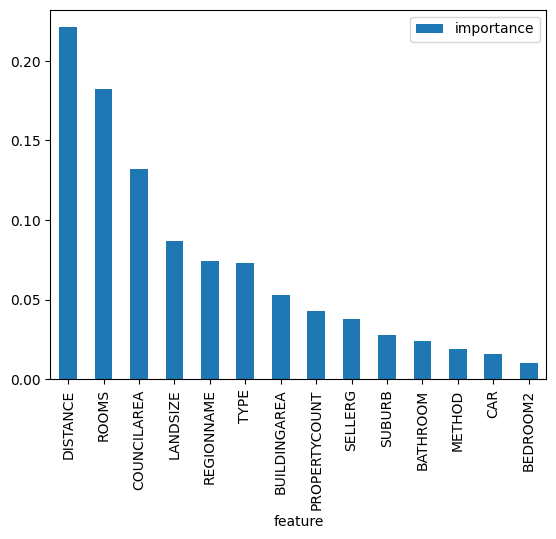

In [31]:
#feature importance
plt.figure(figsize=(25,20))
importance = pd.DataFrame({'feature':X2_train.columns, 'importance': np.round(rf_regressor.feature_importances_,3)})
importance = importance.sort_values('importance', ascending=False).set_index('feature')
importance.plot(kind='bar', rot=90)
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = dict(n_estimators=[10, 25, 50, 100],
                  max_depth=[5, 10, 20, 30],
                  min_samples_leaf=[1,2,4])

grid = GridSearchCV(rf_regressor, param_grid, cv=10,
                    scoring='neg_mean_squared_error')
grid.fit(X2_train,y2_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(n_jobs=2, random_state=0),
             param_grid={'max_depth': [5, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='neg_mean_squared_error')

In [33]:
#Set the model paramters after tunning.
rf_regressor = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=2,
                                             oob_score=False, random_state=0,
                                             verbose=0, warm_start=False) 


In [34]:
# fit the regressor with x and y data 
rf_regressor.fit(X2_train,y2_train)

/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
/Users/adh.arash/Downloads/conda/envs/snowpark/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(criterion='mse', max_features='auto', n_jobs=2,
                      random_state=0)

In [35]:
y2_pred = rf_regressor.predict(X2_test)  # test the output by changing values 

In [36]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y2_test, y2_pred)))

Mean Absolute Error: 176884.42440152582
Mean Squared Error: 85656902397.0197
Root Mean Squared Error: 292672.0048057547


In [37]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y2_test,y2_pred))

R^2 = 0.7846942951694195


In [38]:
errors = abs(y2_pred - y2_test)
MSE=round(np.mean(errors),2)
MAPE=100*(errors/y2_test)
accuracy=round (100 - np.mean(MAPE),2)
print(accuracy)

83.3


In [39]:
df2= pd.DataFrame({'Actual_Price': np.round(y2_test), 
                   'Predicted_Price': np.round(y2_pred),
                 })
df2['difference']=df2.apply(lambda x: x.Predicted_Price-x.Actual_Price,axis=1)
df2.head(10)

,Actual_Price,Predicted_Price,difference
13805,1800000.0,1510434.0,-289566.0
6821,1335000.0,1273470.0,-61530.0
6590,662000.0,559987.0,-102013.0
24336,769000.0,704359.0,-64641.0
22019,720000.0,770161.0,50161.0
20671,2536000.0,2371678.0,-164322.0
14715,910000.0,813050.0,-96950.0
17980,945000.0,848077.0,-96923.0
10676,672000.0,692330.0,20330.0
9673,360000.0,437982.0,77982.0


In [42]:

# Creating a User Defined Function within Snowflake to do the scoring there
def predict_pandas_udf_RF(df2: pd.DataFrame) -> pd.Series:
    return pd.Series(rf_regressor.predict(df2))  


In [44]:
housepricingdf.columns = map(lambda x: str(x).upper(), housepricingdf.columns)
snowdf_details = session.createDataFrame(housepricingdf)
snowdf_details.show()
snowdf_details.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded_RF") 

session.table("HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded").show(5)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"  |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"  |"REGIONNAME"  |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"  |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"  |"BUILDINGAREA"      |"PRICE"    |
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|292       |3        |0       |1         |95         |5             |5457.0           |11.2        |2              |3.0         |1.0         |2.0    |490.0       |158.00110757388654  |1205000.0  |
|292       |2        |2       |1         |95         |5             |5457.0           |11.2        |2              |2.0         |1.0         |2.0    |108.0       |158.00110757388654  |813000.0   |
|329       |3  

In [45]:
RF_model_vec = pandas_udf(func=predict_pandas_udf_RF,
                                return_type=FloatType(),
                                input_types=[IntegerType(),IntegerType(),IntegerType(),IntegerType(),IntegerType(),IntegerType(),FloatType(),FloatType(),FloatType(),IntegerType(),FloatType(),FloatType(),FloatType(),FloatType()],
                                session=session,
                                packages = ("pandas","scikit-learn"), max_batch_size=200)

In [49]:

# Calling the UDF to do the scoring (pushing down to Snowflake)
output_RF = session.table('HOUSING.PUBLIC.FULL_HOUSINGPRICE_encoded_RF').select(*list(X2.columns),
                    RF_model_vec(list(X2.columns)).alias('PREDICTED_PRICE'),
                    (F.col('Price')).alias('ACTUAL_PRICE')                                              
                    )

output_RF.show(5)


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"  |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"  |"REGIONNAME"  |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"  |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"  |"BUILDINGAREA"      |"PREDICTED_PRICE"  |"ACTUAL_PRICE"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|292       |3        |0       |1         |95         |5             |5457.0           |11.2        |2              |3.0         |1.0         |2.0    |490.0       |158.00110757388654  |1292450.0          |1205000.0       |
|292       |2        |2       |1         |95         |5             |5457.0           |11.2        |2           

In [50]:
output_RF=output_RF.to_pandas()

In [51]:
output_RF.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,219,1,2,1,244,5,2555.0,14.6,12,1.0,1.0,1.0,106.000000,51.000000,3.663850e+05,380500.0
1,329,3,0,3,275,6,6380.0,8.0,10,0.0,0.0,0.0,584.022263,158.001108,1.029343e+06,920000.0
2,211,3,0,4,58,5,2019.0,4.1,26,3.0,1.0,1.0,279.000000,133.000000,2.437160e+06,2600000.0
3,30,2,0,1,46,5,10969.0,13.9,8,2.0,2.0,1.0,176.000000,125.000000,8.131600e+05,825000.0
4,236,4,1,3,40,2,2651.0,11.5,24,0.0,0.0,0.0,584.022263,158.001108,6.932525e+05,670000.0


In [52]:
output_RF.SUBURB=le1.inverse_transform(output_RF.SUBURB)
output_RF.TYPE = le2.inverse_transform(output_RF.TYPE)
output_RF.METHOD = le3.inverse_transform(output_RF.METHOD)
output_RF.SELLERG=le4.inverse_transform(output_RF.SELLERG)
output_RF.REGIONNAME=le5.inverse_transform(output_RF.REGIONNAME)
output_RF.COUNCILAREA = le6.inverse_transform(output_RF.COUNCILAREA)


In [54]:
output_RF.head()

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,Moorabbin,1,u,S,Ray,Southern Metropolitan,2555.0,14.6,Kingston City Council,1.0,1.0,1.0,106.000000,51.000000,3.663850e+05,380500.0
1,Williamstown,3,h,SP,Sweeney,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,0.0,0.0,0.0,584.022263,158.001108,1.029343e+06,920000.0
2,Middle Park,3,h,VB,Cayzer,Southern Metropolitan,2019.0,4.1,Port Phillip City Council,3.0,1.0,1.0,279.000000,133.000000,2.437160e+06,2600000.0
3,Bentleigh East,2,h,S,Buxton,Southern Metropolitan,10969.0,13.9,Glen Eira City Council,2.0,2.0,1.0,176.000000,125.000000,8.131600e+05,825000.0
4,Oak Park,4,t,SP,Brad,Northern Metropolitan,2651.0,11.5,Moreland City Council,0.0,0.0,0.0,584.022263,158.001108,6.932525e+05,670000.0


In [55]:
snowdf_details_RF = session.createDataFrame(output_RF)
snowdf_details_RF.show()
snowdf_details_RF.write.mode("overwrite").saveAsTable("HOUSING.PUBLIC.FULL_HOUSINGPRICE_PREDICTED_RF") 




-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|"SUBURB"         |"ROOMS"  |"TYPE"  |"METHOD"  |"SELLERG"  |"REGIONNAME"           |"PROPERTYCOUNT"  |"DISTANCE"  |"COUNCILAREA"              |"BEDROOM2"  |"BATHROOM"  |"CAR"  |"LANDSIZE"         |"BUILDINGAREA"      |"PREDICTED_PRICE"   |"ACTUAL_PRICE"  |
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
|Moorabbin        |1        |u       |S         |Ray        |Southern Metropolitan  |2555.0           |14.6        |Kingston City Council      |1.0         |1.0         |1.0    |106.0              |51.0                |366385.

In [56]:
# Also get a local dataframe to review the results
snowdf_details_RF=snowdf_details_RF.toPandas()
snowdf_details_RF

,SUBURB,ROOMS,TYPE,METHOD,SELLERG,REGIONNAME,PROPERTYCOUNT,DISTANCE,COUNCILAREA,BEDROOM2,BATHROOM,CAR,LANDSIZE,BUILDINGAREA,PREDICTED_PRICE,ACTUAL_PRICE
0,Moorabbin,1,u,S,Ray,Southern Metropolitan,2555.0,14.6,Kingston City Council,1.0,1.0,1.0,106.000000,51.000000,3.663850e+05,380500.0
1,Williamstown,3,h,SP,Sweeney,Western Metropolitan,6380.0,8.0,Hobsons Bay City Council,0.0,0.0,0.0,584.022263,158.001108,1.029343e+06,920000.0
2,Middle Park,3,h,VB,Cayzer,Southern Metropolitan,2019.0,4.1,Port Phillip City Council,3.0,1.0,1.0,279.000000,133.000000,2.437160e+06,2600000.0
3,Bentleigh East,2,h,S,Buxton,Southern Metropolitan,10969.0,13.9,Glen Eira City Council,2.0,2.0,1.0,176.000000,125.000000,8.131600e+05,825000.0
4,Oak Park,4,t,SP,Brad,Northern Metropolitan,2651.0,11.5,Moreland City Council,0.0,0.0,0.0,584.022263,158.001108,6.932525e+05,670000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23566,Langwarrin,3,h,VB,O'Brien,Eastern Victoria,8743.0,41.0,Frankston City Council,3.0,3.0,2.0,1060.000000,158.001108,7.361300e+05,650000.0
23567,Kingsville,3,h,SP,Jas,Western Metropolitan,1808.0,6.4,Maribyrnong City Council,3.0,1.0,1.0,275.000000,11.000000,9.244900e+05,900000.0
23568,Heathmont,4,h,S,Fletchers,Eastern Metropolitan,3794.0,21.3,Maroondah City Council,4.0,2.0,0.0,1060.000000,158.001108,1.064096e+06,1031000.0
23569,Heidelberg Heights,3,u,VB,Miles,Eastern Metropolitan,2947.0,8.8,Banyule City Council,3.0,1.0,1.0,146.000000,158.001108,6.839800e+05,720000.0
